In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_csv("Tides_and_Blue_Bucket_Data.csv")

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
datetime.strptime(data['Cleanup Date'][30000], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2021, 4, 24, 0, 0)

In [3]:
data['Cleanup Timestamp'] = pd.to_datetime(data['Cleanup Date'], format="%Y-%m-%d %H:%M:%S")

In [4]:
df = data.groupby('Cleanup Timestamp').agg('sum')

In [5]:
# df['Single Use Plastics'] = df['Food Wrappers (candy, chips, etc.)'] + df['Take Out/Away Containers (Plastic)'] + df['Bottle Caps (Plastic)'] + df['Lids (Plastic)'] + 
# df['Beverage Bottles (Plastic)'] + df['Grocery Bags (Plastic)'] + df['Other Plastic Bags'] + df['Cups, Plates (Plastic)'] + df['Other Plastic/Foam Packaging'] + df['Other Plastic Bottles (oil, bleach, etc.)']



In [6]:
df['log Plastic Pieces'] = np.log(df['Plastic Pieces'])

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


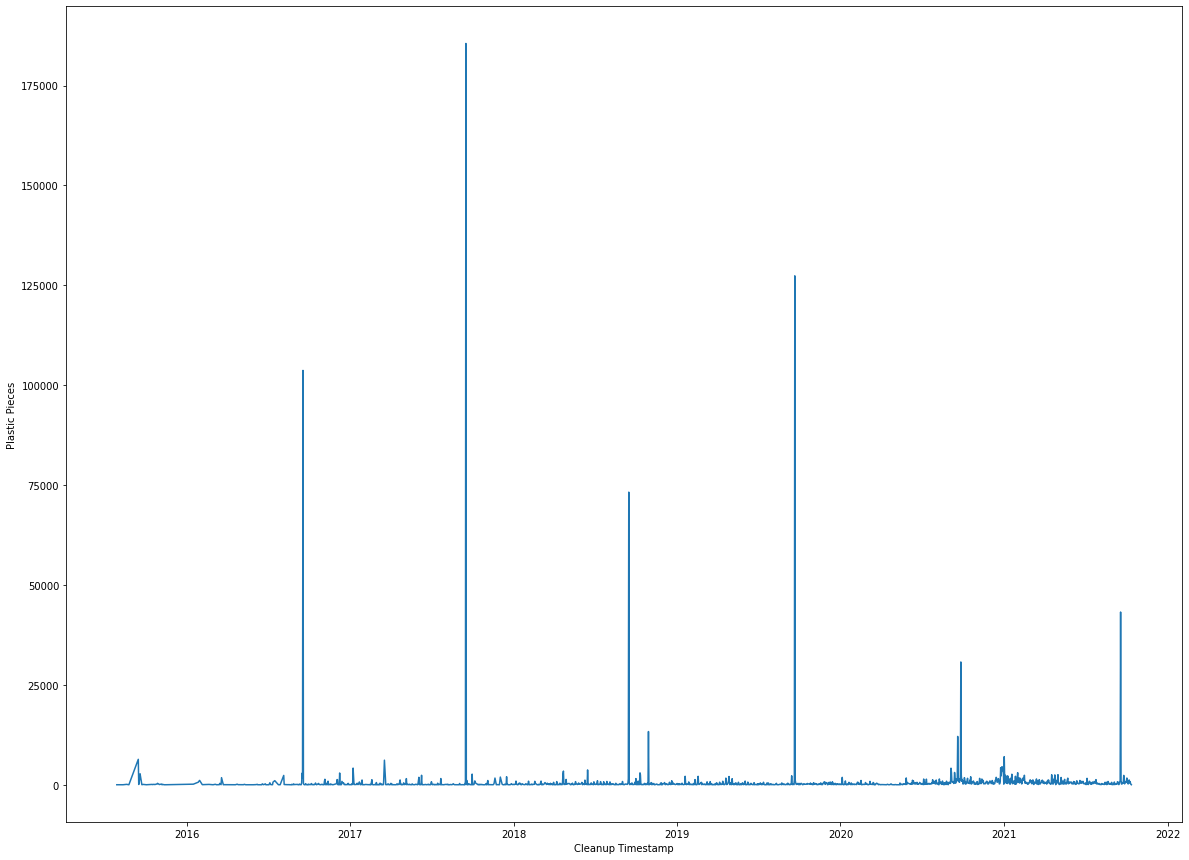

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (20,15)

sns.lineplot(x="Cleanup Timestamp", y="Plastic Pieces", data=df);

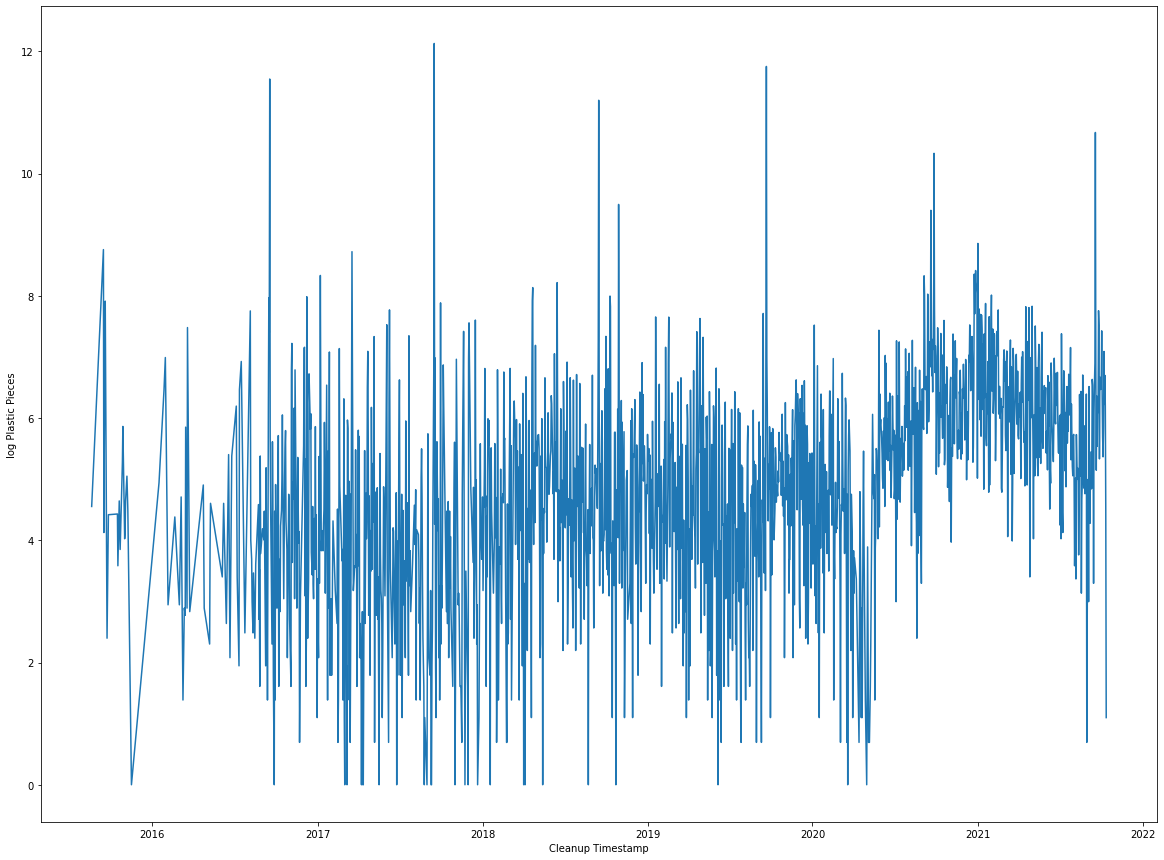

In [8]:
sns.lineplot(x="Cleanup Timestamp", y="log Plastic Pieces", data=df);